In [1]:
import warnings
# warnings.filterwarnings("ignore")

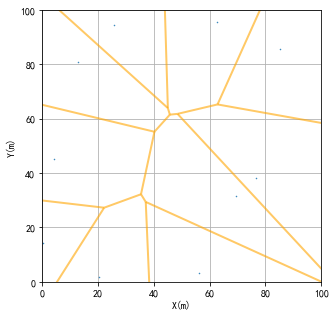

In [5]:
from udntools.region import ServiceRegion 

service_region = ServiceRegion(0, 100,    #x轴
                               0, 100,    #y轴
                               10, 10,  #基站数，用户数
                               bs_distribution="uniform",
                               if_fix_bs=False) 
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# plt.scatter(service_region.bs_position_[:,0], service_region.bs_position_[:,1])
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
vor = Voronoi(service_region.bs_position_)
voronoi_plot_2d(vor, 
                           show_vertices=False, 
                           show_points=True,
                           line_colors='orange',
                           line_width=2, 
                           line_alpha=0.6, 
                           point_size=1,
                           line_style="solid",
                           ax=ax)
plt.xlim(service_region.x_min, service_region.x_max)
plt.ylim(service_region.y_min, service_region.y_max)
plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.grid(True)
plt.show()
fig.savefig('bs_station.pdf')
fig.savefig('bs_station.png')


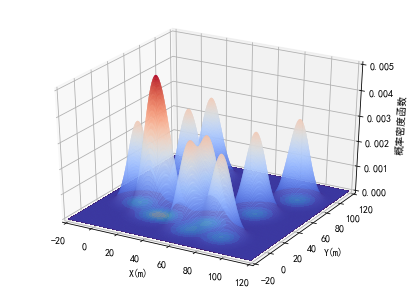

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
params = {'axes.labelsize': 10,'axes.titlesize':10,  'legend.fontsize': 15, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)

# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x = np.arange(service_region.x_min - 20, service_region.x_max + 20, 0.5)
y = np.arange(service_region.y_min - 20, service_region.y_max + 20, 0.5)
X, Y = np.meshgrid(x, y)
pdf = np.zeros(X.shape)
fig = plt.figure(figsize=(7,5))
sigma = 7.0
# 创建3d图形的两种方式
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
for i in range(service_region.bs_number_):
    # pdf = X * Y
    pdf += 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(- (X - service_region.bs_position_[i, 0]) ** 2 / (2 * sigma** 2)) *  1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(- (Y - service_region.bs_position_[i, 1]) ** 2 / (2 * sigma ** 2))
ax.plot_surface(X, Y, pdf, rstride=1, cstride=1, cmap=plt.cm.coolwarm)
plt.xlim(service_region.x_min - 20, service_region.x_max + 20)
plt.ylim(service_region.y_min - 20, service_region.y_max + 20)
ax.set_zlim(0, 0.005)
ax.contourf(X,Y,pdf,zdir='z',offset=0)
ax.set_xlabel('X(m)', x = -0.1)
ax.set_ylabel('Y(m)')
ax.set_zlabel('概率密度函数', x=0.5, y=0.5)#给三个坐标轴注明
fig.savefig('mix_gaussian_pdf.pdf')
fig.savefig('mix_gaussian_pdf.png')
plt.show()

In [4]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'